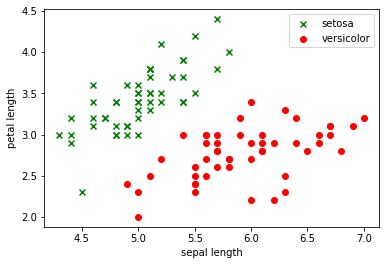

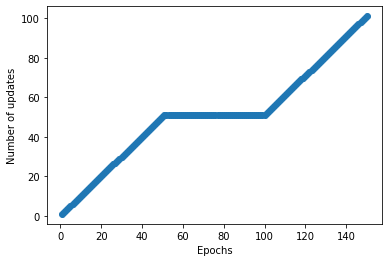

In [1]:
import numpy as np
class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self
  def net_input(self, X):
    z = np.dot(X, self.weights[1:]) + self.weights[0]
    return z
  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, -1)
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
images = np.load("images.npy")
labels = np.load("labels.npy")
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.1, random_state=42)
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])
train_set_x = X_train_flatten / 255.
test_set_x = X_test_flatten / 255.
print(train_set_x.shape)

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros([dim, 1], dtype="float64")
    b = 0.0
    return w, b
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))) / m

    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m

    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
def gradient_decent(w, b, X, Y, num_iterations=100, learning_rate=0.009):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            print("Cost after iteration %i: %f" % (i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] > 0 and A[0, i] < 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

In [ ]:
c = []
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = gradient_decent(
        w, b, X_train, Y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    c.append(costs)
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d

In [ ]:
logistic_regression_model = model(train_set_x, y_train, test_set_x, y_test, num_iterations=10000, learning_rate=0.01)
c

In [ ]:
def relu(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    cache = Z
    return A, cache
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)  
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ